In [3]:
import sys
sys.path.append('../')
from src.preprocessing.data_loader import load_and_process_data
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = load_and_process_data(remove_outliers=True, normalize=False, lab="all", verbose=False)
df['logrms'] = np.log1p(df['rms'])
df.insert(7, 'logrms', df.pop('logrms'))
df

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,logrms,mouseID,lab,sleepstage,epoch,unique_id
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,0.291750,1.0,1.0,3.0,1.0,1
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,0.222120,1.0,1.0,3.0,2.0,1
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,0.206086,1.0,1.0,3.0,3.0,1
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,0.192252,1.0,1.0,1.0,6.0,1
6,0.077062,0.133382,0.458816,0.114722,0.097439,0.039885,0.228008,0.205394,1.0,1.0,1.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958286,0.139606,0.095954,0.214060,0.121142,0.201720,0.156274,0.123541,0.116485,16.0,5.0,3.0,10794.0,150
1958287,0.113887,0.122214,0.271802,0.143455,0.170195,0.169966,0.125525,0.118250,16.0,5.0,3.0,10795.0,150
1958288,0.096449,0.254481,0.149651,0.123115,0.101740,0.076557,0.097413,0.092956,16.0,5.0,3.0,10796.0,150
1958289,0.065317,0.313154,0.243949,0.100223,0.075370,0.135688,0.077541,0.074681,16.0,5.0,3.0,10797.0,150


In [18]:
label = 'sleepstage'
features = ['slowdelta', 'fastdelta', 'slowtheta', 'fasttheta', 'alpha', 'beta', 'rms', 'logrms']

X = df[features]
y = df[label]

In [19]:
X

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,logrms
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,0.291750
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,0.222120
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,0.206086
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,0.192252
6,0.077062,0.133382,0.458816,0.114722,0.097439,0.039885,0.228008,0.205394
...,...,...,...,...,...,...,...,...
1958286,0.139606,0.095954,0.214060,0.121142,0.201720,0.156274,0.123541,0.116485
1958287,0.113887,0.122214,0.271802,0.143455,0.170195,0.169966,0.125525,0.118250
1958288,0.096449,0.254481,0.149651,0.123115,0.101740,0.076557,0.097413,0.092956
1958289,0.065317,0.313154,0.243949,0.100223,0.075370,0.135688,0.077541,0.074681


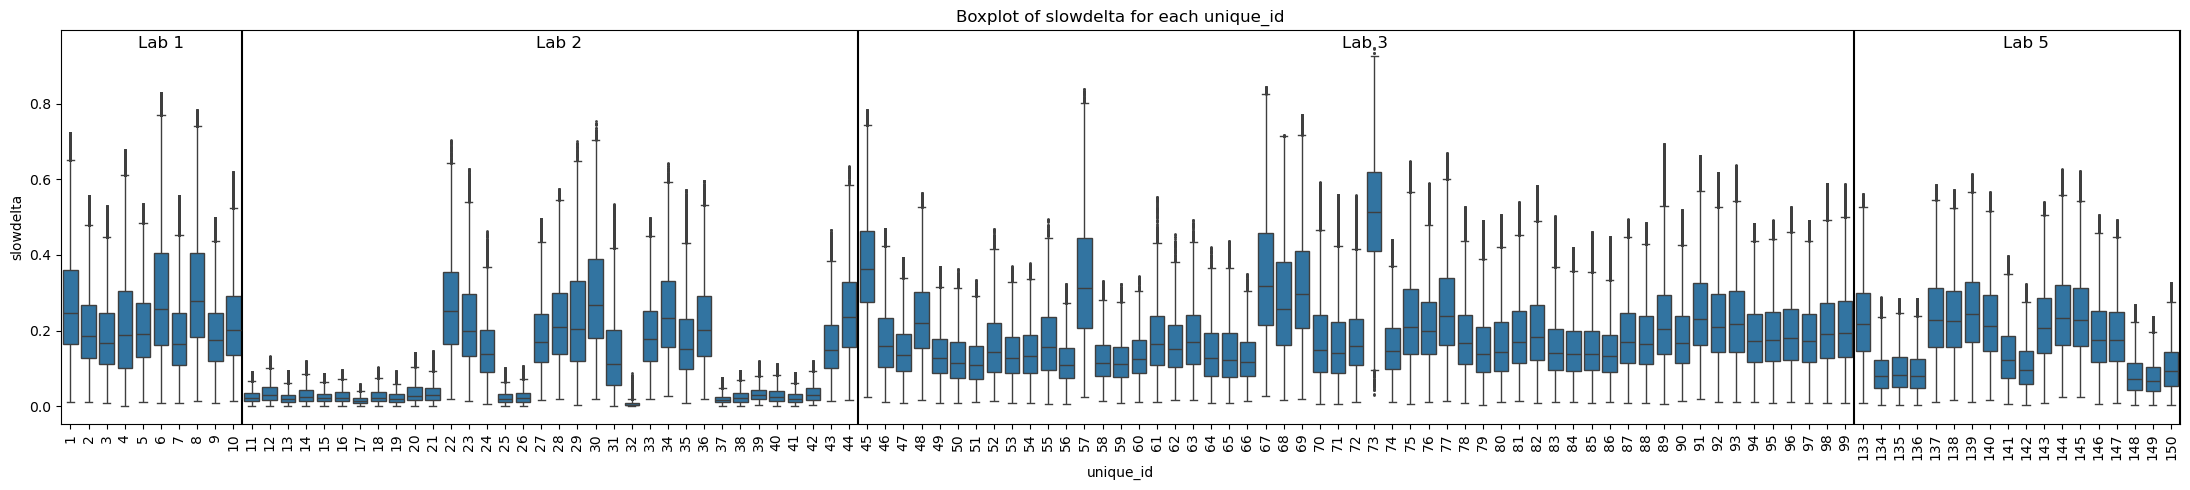

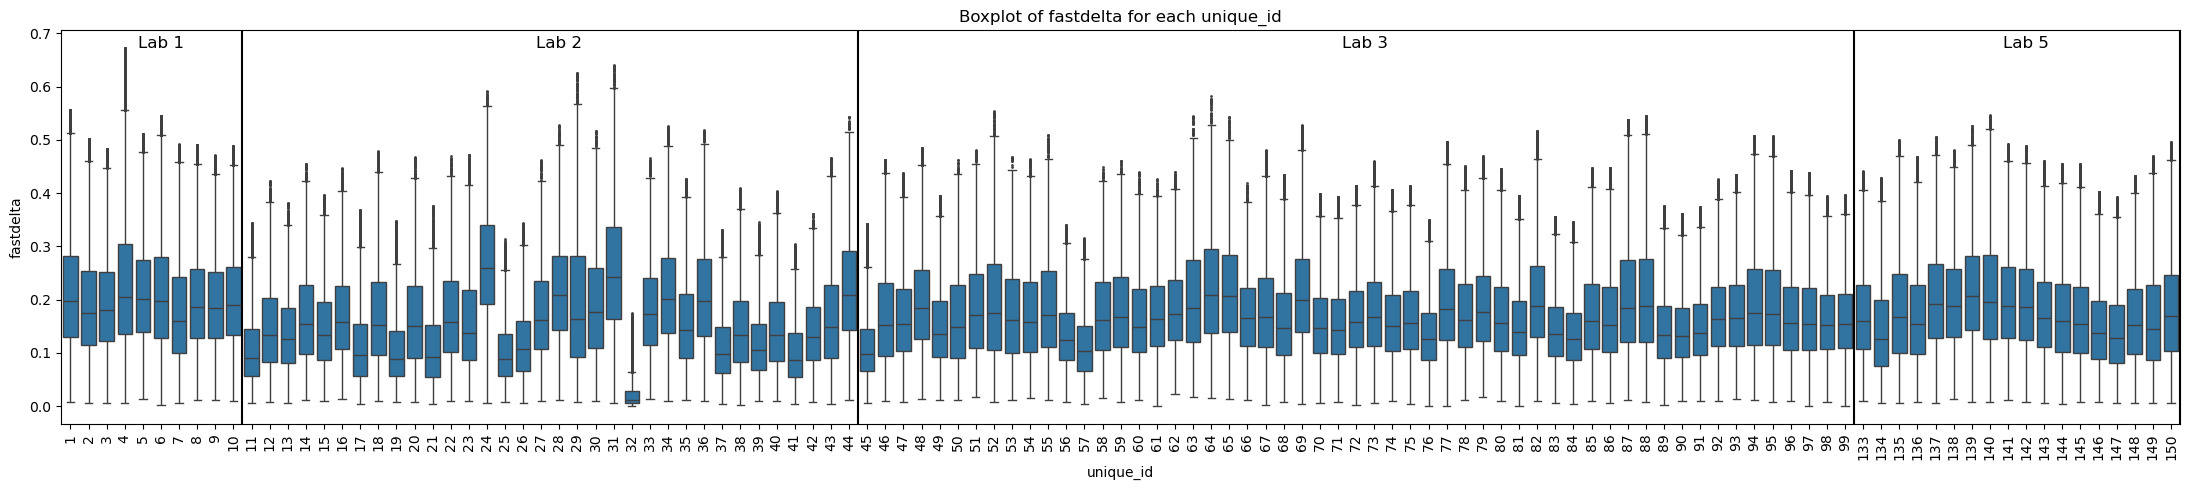

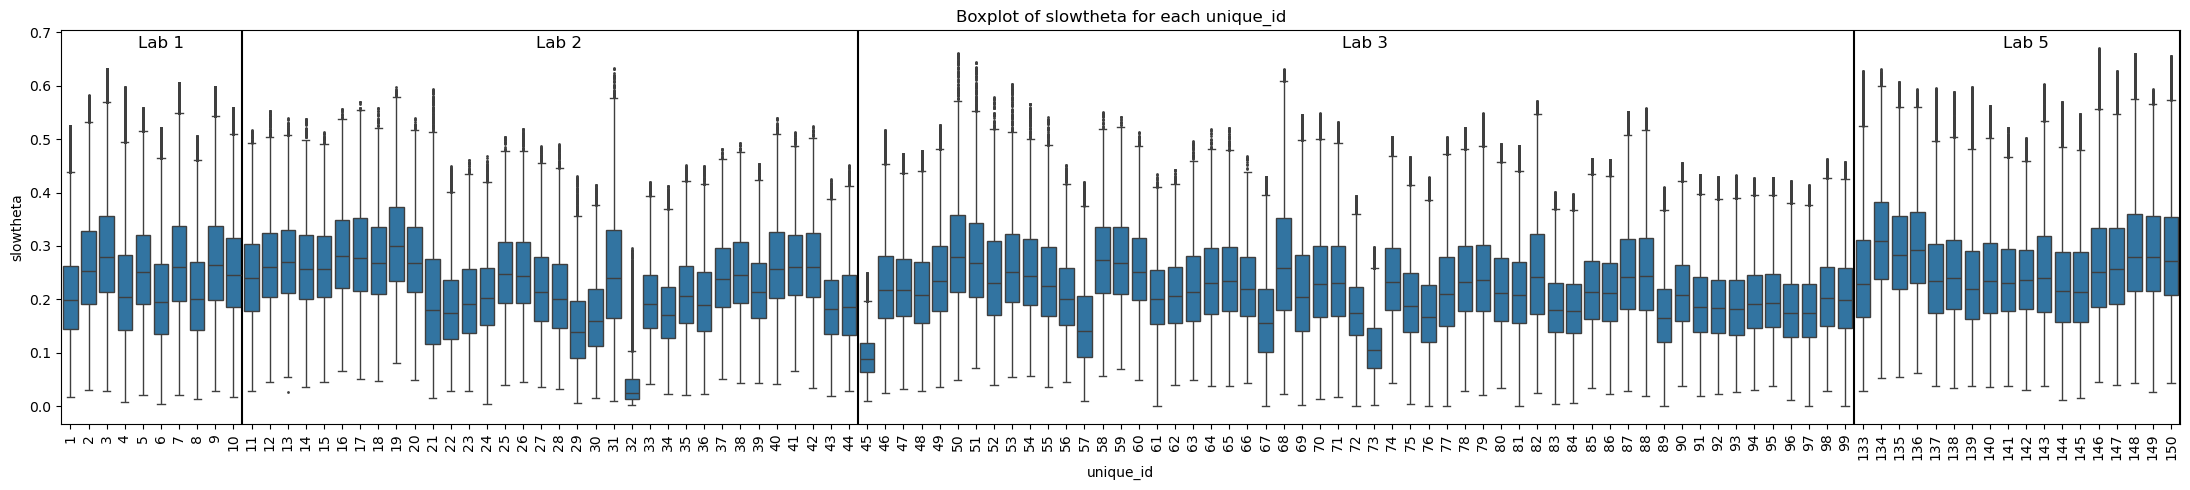

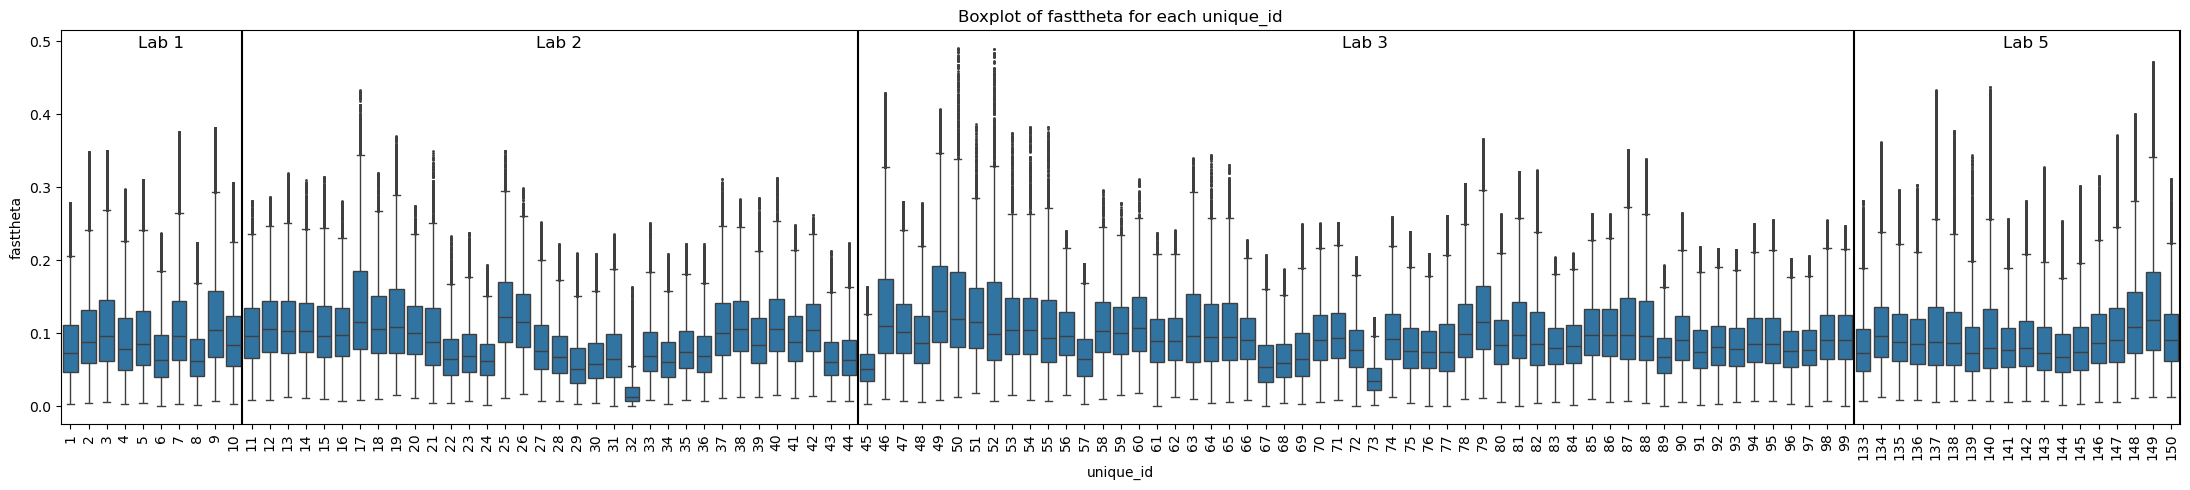

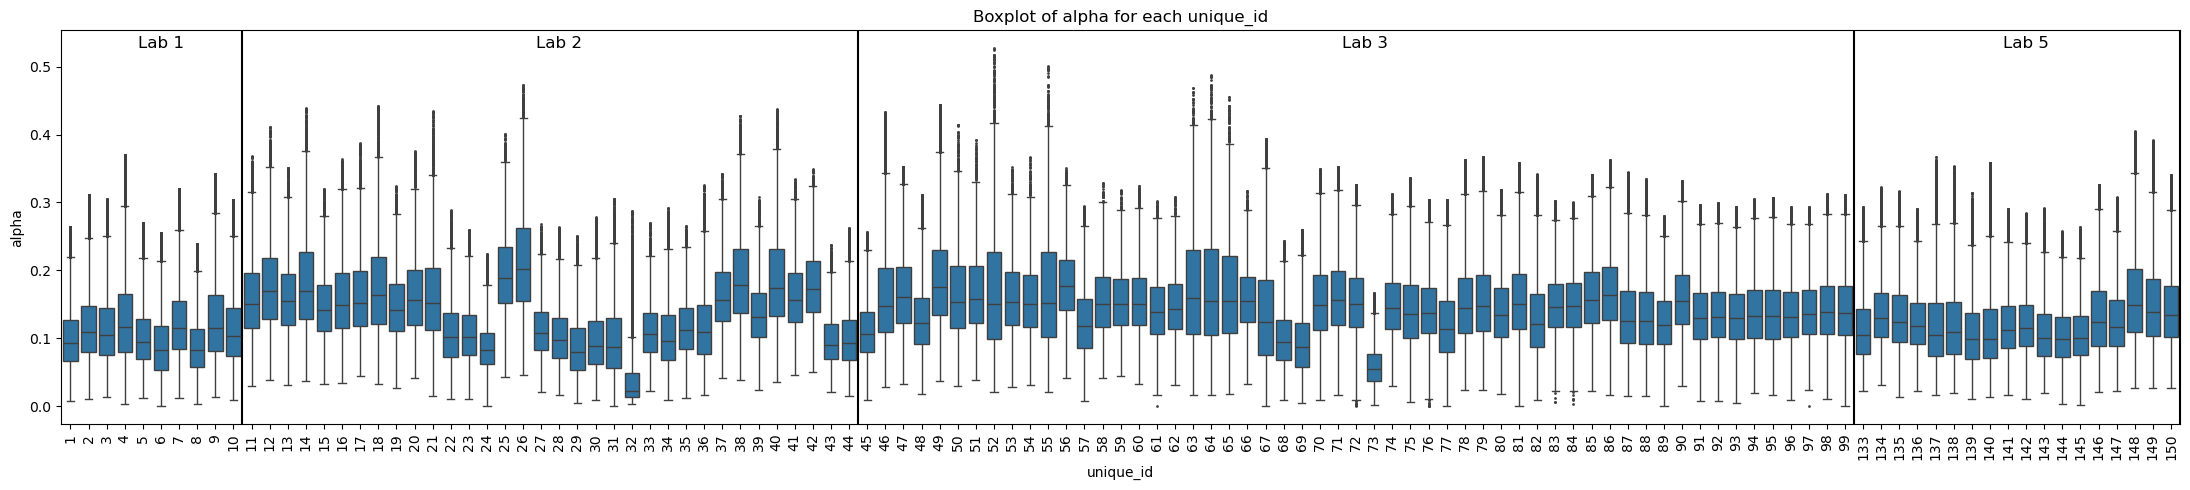

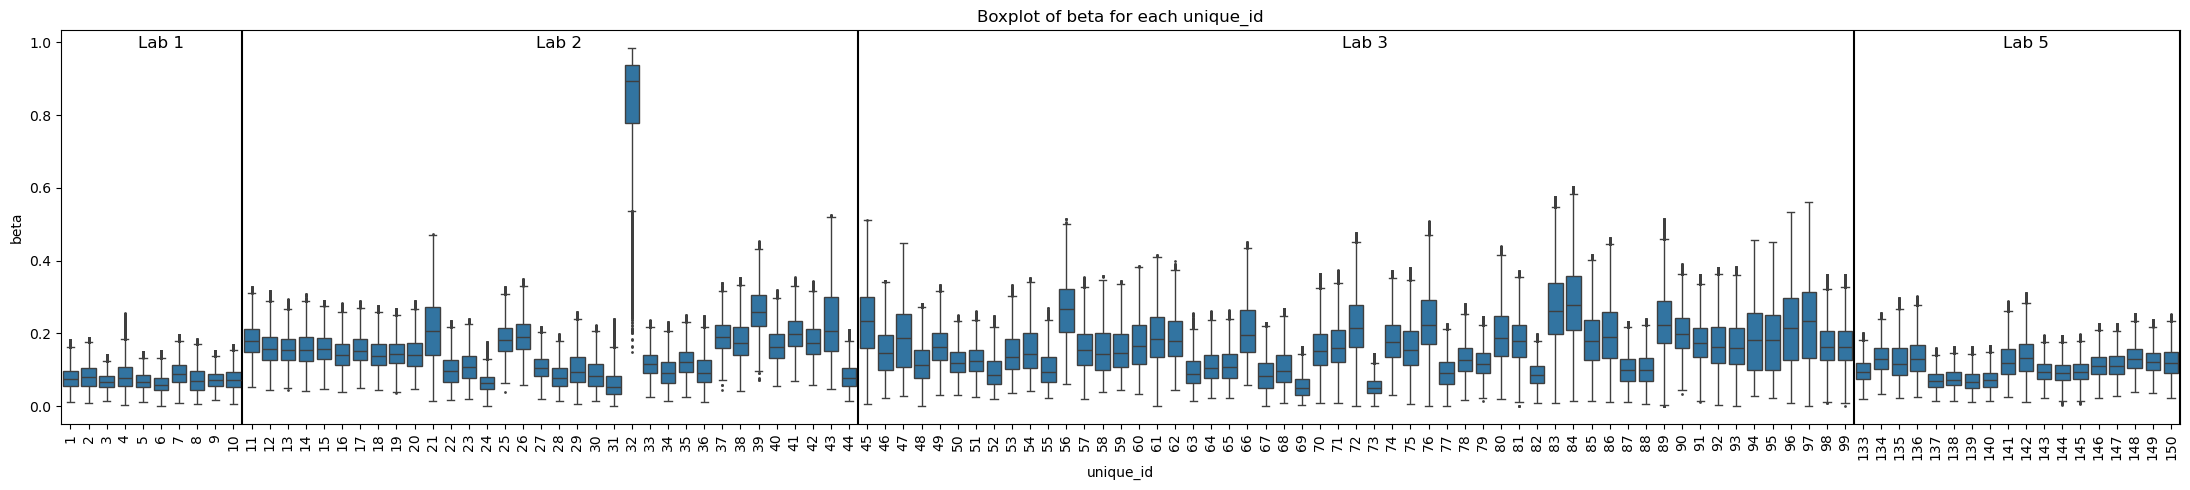

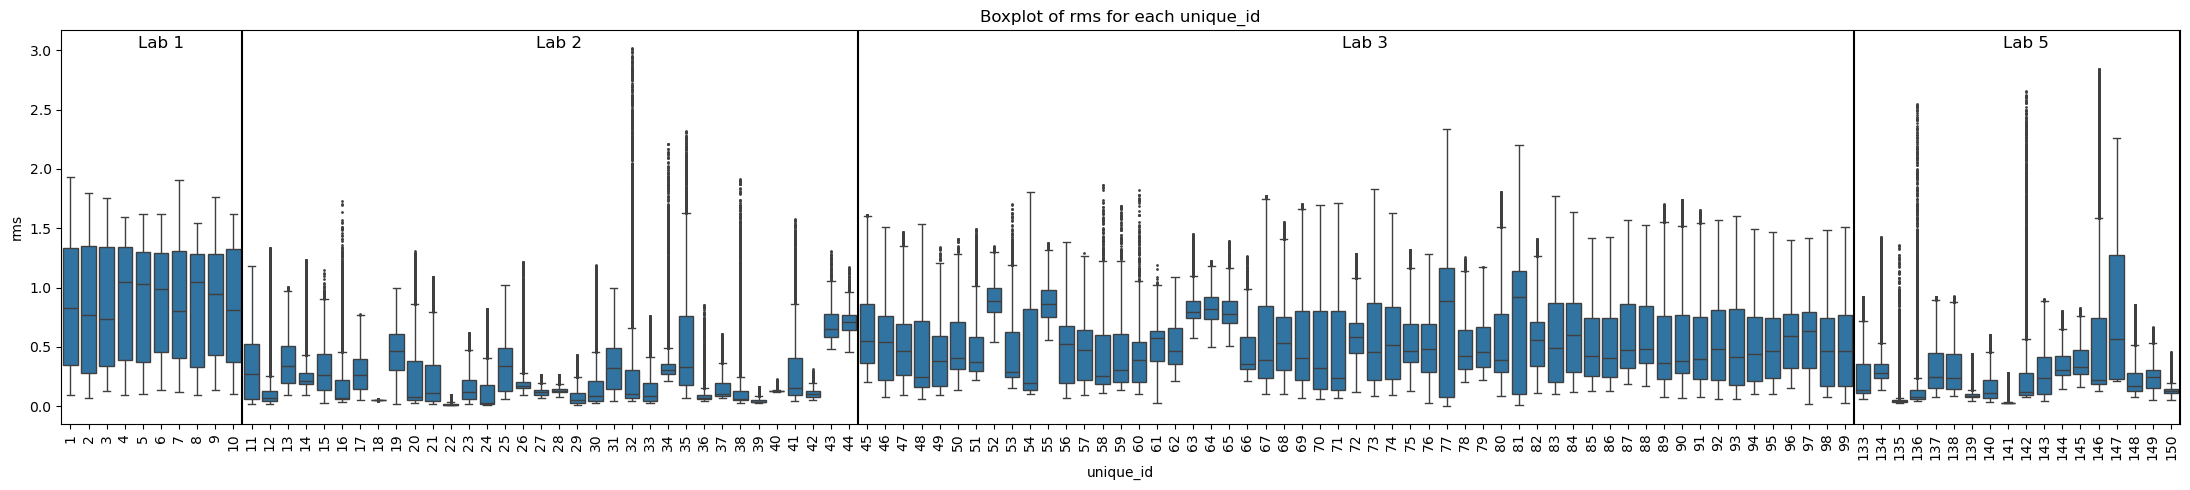

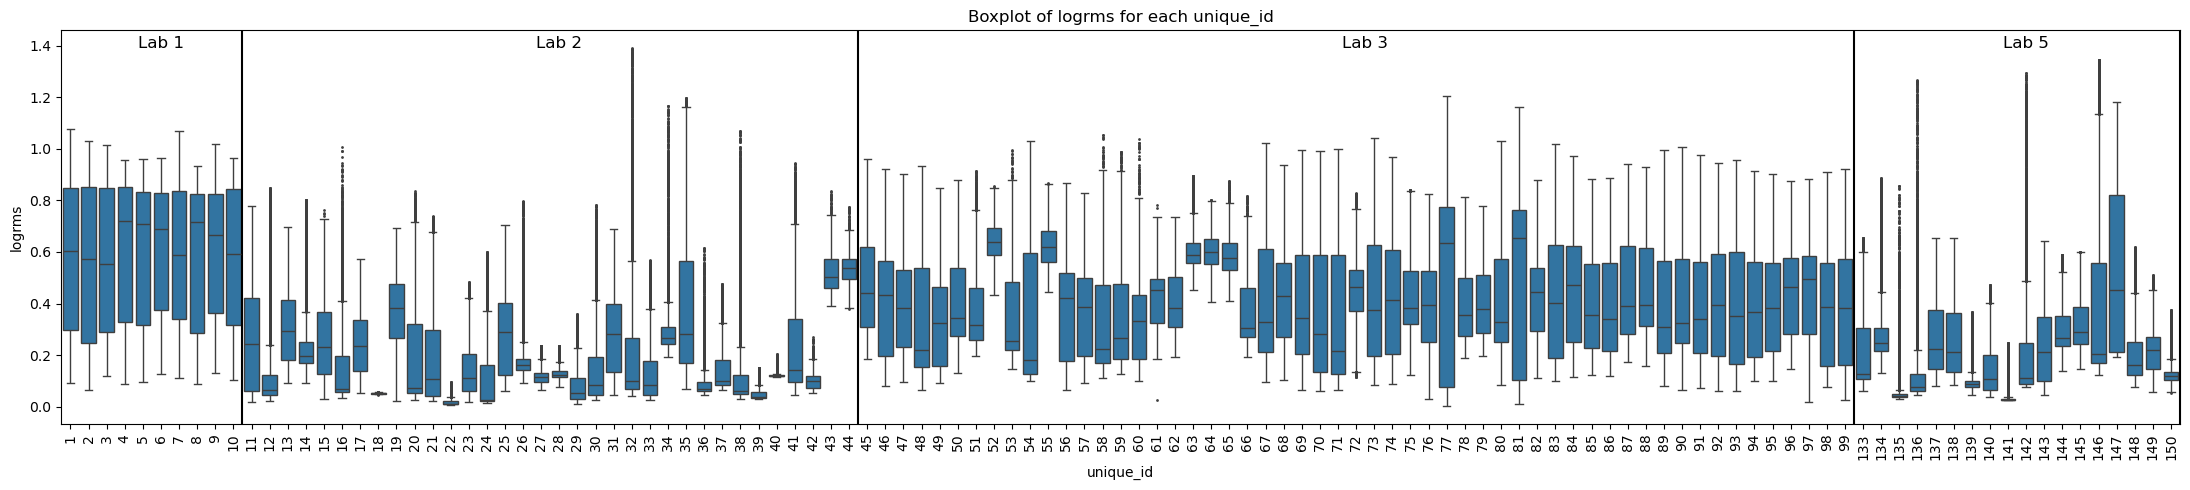

In [38]:
# boxplot RMS for each unique_id
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(22, 5))
    # color each boxplot by lab
    y1 = feature
    sns.boxplot(x='unique_id', y=y1, data=df, fliersize=1)

    labindex = np.array(df.groupby('lab')['mouseID'].nunique())
    labindex_cum = np.cumsum(labindex)

    for i in range(len(labindex_cum)):
        plt.axvline(labindex_cum[i]-0.5, color='black', linestyle='-')
        lab_height = df[y1].max()
        if i == 3:
            plt.text(labindex_cum[i]-labindex[i]/2, lab_height, 'Lab ' + str(i+2), fontsize=12, ha='center')
        else:
            plt.text(labindex_cum[i]-labindex[i]/2, lab_height, 'Lab ' + str(i+1), fontsize=12, ha='center')
    plt.title(f'Boxplot of {y1} for each unique_id')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'src/plot_data/data/boxplot_{y1}_unique_id.png', dpi=600)
    plt.show()

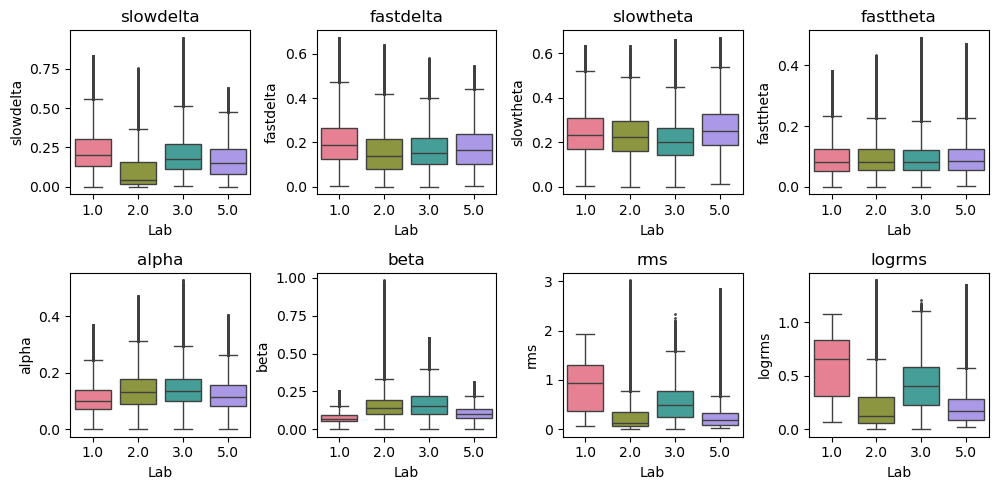

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('../')

# Convert lab column to string to ensure consistency in mapping
df['lab2'] = df['lab'].astype(str)

# Assuming 'lab' is the column that distinguishes different labs
labs = df['lab2'].unique()

# Define a color palette with as many colors as there are unique labs
palette = sns.color_palette("husl", len(labs))

# Create a dictionary to map each lab to a color
lab_color_mapping = {lab: color for lab, color in zip(labs, palette)}

# All the features for each lab
plt.figure(figsize=(10, 5))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='lab2', y=feature, data=df, hue='lab2', palette=lab_color_mapping, fliersize=1, legend=False)
    plt.title(feature)
    plt.xlabel('Lab')
plt.tight_layout()
plt.savefig('src/plot_data/boxplot_lab.png', dpi=600)
plt.show()